<a href="https://colab.research.google.com/github/carakhan15/ml-projects/blob/master/Bechdel_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bechdel Test


A representation of the high bar we've set for female representation in media:

1. It has to have at least two **named** women in it
2. Who talk to each other
3. About something besides a man

## Pretty easy test to pass?

### Who passed:

### This (intro to Sir Mix-A-Lot's Baby Got Back) passes the test




![Sir Mix-A-Lot Baby Got Back
](https://cdn-images-1.medium.com/max/1600/1*zWGELgvKjHIq1Jcssennqw.gif)

### Who didn't pass:

### These (entire Avengers and Avatar movies) do not pass the test
![alt text](https://media.giphy.com/media/o1TNEDTNCVoVq/giphy.gif)

![alt text](https://media.giphy.com/media/f4F9XFpfyNG3C/giphy.gif)

# Setting Up

## Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


In [0]:
# List
import os;os.listdir("/content/gdrive/My Drive")

In [0]:
# List in Bash
!ls -l /content/gdrive/My\ Drive/

## Kaggle

In [0]:
## if not installed then:
#!pip install kaggle

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!cp /content/gdrive/My\ Drive/ML/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d fivethirtyeight/fivethirtyeight-bechdel-dataset
!ls -l /content
!unzip /content/fivethirtyeight-bechdel-dataset.zip

  0% 0.00/75.7k [00:00<?, ?B/s]
100% 75.7k/75.7k [00:00<00:00, 66.1MB/s]
total 84
-rw-r--r-- 1 root root 77565 Mar  1 16:33 fivethirtyeight-bechdel-dataset.zip
drwx------ 4 root root  4096 Mar  1 16:32 gdrive
drwxr-xr-x 1 root root  4096 Feb 26 17:33 sample_data
Archive:  /content/fivethirtyeight-bechdel-dataset.zip
  inflating: README.md               
  inflating: analyze-bechdel.R       
  inflating: movies.csv              


## Import Libraries and Data

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

df_bech = pd.read_csv("/content/movies.csv")
df_bech.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0


# EDA + Cleaning

In [0]:
df_bech.shape

(1794, 15)

## Get IMDB dataset

In [0]:
#!kaggle datasets download -d orgesleka/imdbmovies
#!ls -l /content
#!unzip /content/imdbmovies.zip

  0% 0.00/801k [00:00<?, ?B/s]
100% 801k/801k [00:00<00:00, 52.2MB/s]
total 1100
---------- 1 root root   2768 Feb  1 15:00 analyze-bechdel.R
-rw-r--r-- 1 root root  77565 Mar  1 02:30 fivethirtyeight-bechdel-dataset.zip
drwx------ 4 root root   4096 Mar  1 02:29 gdrive
-rw-r--r-- 1 root root 819873 Mar  1 02:30 imdbmovies.zip
---------- 1 root root 207689 Feb  1 15:00 movies.csv
---------- 1 root root    234 Feb  1 15:00 README.md
drwxr-xr-x 1 root root   4096 Feb 26 17:33 sample_data
Archive:  /content/imdbmovies.zip
  inflating: imdb.csv                


In [0]:
#imdb = pd.read_csv("/content/imdb.csv", error_bad_lines=False)


b'Skipping line 66: expected 44 fields, saw 46\nSkipping line 111: expected 44 fields, saw 45\nSkipping line 198: expected 44 fields, saw 45\nSkipping line 222: expected 44 fields, saw 46\nSkipping line 278: expected 44 fields, saw 45\nSkipping line 396: expected 44 fields, saw 45\nSkipping line 403: expected 44 fields, saw 45\nSkipping line 421: expected 44 fields, saw 45\nSkipping line 437: expected 44 fields, saw 45\nSkipping line 462: expected 44 fields, saw 46\nSkipping line 491: expected 44 fields, saw 45\nSkipping line 515: expected 44 fields, saw 45\nSkipping line 529: expected 44 fields, saw 45\nSkipping line 530: expected 44 fields, saw 45\nSkipping line 558: expected 44 fields, saw 45\nSkipping line 623: expected 44 fields, saw 45\nSkipping line 646: expected 44 fields, saw 45\nSkipping line 663: expected 44 fields, saw 46\nSkipping line 713: expected 44 fields, saw 45\nSkipping line 730: expected 44 fields, saw 47\nSkipping line 791: expected 44 fields, saw 45\nSkipping lin

In [0]:
#imdb.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0


### Converting to TMDB

In [0]:
!kaggle datasets download -d tmdb/tmdb-movie-metadata
!unzip tmdb-movie-metadata.zip

  0% 0.00/9.30M [00:00<?, ?B/s]
100% 9.30M/9.30M [00:00<00:00, 85.3MB/s]
Archive:  tmdb-movie-metadata.zip
  inflating: tmdb_5000_credits.csv   
  inflating: tmdb_5000_movies.csv    


In [0]:
import json
import pandas as pd

def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df


def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

In [0]:
LOST_COLUMNS = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews'
                ]

# Columns in TMDb that had direct equivalents in the IMDB version. 
# These columns can be used with old kernels just by changing the names
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',  # it's possible that spoken_languages would be a better match
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users',
                                         }

IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}


def safe_access(container, index_values):
    # return a missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan


def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])


def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])


def convert_to_original_format(movies, credits):
    # Converts TMDb data to make it as compatible as possible with kernels built on the original version of the data.
    tmdb_movies = movies.copy()
    tmdb_movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    tmdb_movies['title_year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)
    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['language'] = tmdb_movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['director_name'] = credits['crew'].apply(get_director)
    tmdb_movies['actor_1_name'] = credits['cast'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['actor_2_name'] = credits['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['actor_3_name'] = credits['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipe_flatten_names)
    tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(pipe_flatten_names)
    return tmdb_movies

In [0]:
movies = load_tmdb_movies("../content/tmdb_5000_movies.csv")
credits = load_tmdb_credits("../content/tmdb_5000_credits.csv")
tmdb =convert_to_original_format(movies, credits)

In [0]:
tmdb.columns

Index(['budget', 'genres', 'homepage', 'id', 'plot_keywords', 'language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'num_voted_users', 'title_year', 'country', 'director_name',
       'actor_1_name', 'actor_2_name', 'actor_3_name'],
      dtype='object')

In [0]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [0]:
df_bech.columns

Index(['year', 'imdb', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'code', 'budget_2013$', 'domgross_2013$',
       'intgross_2013$', 'period code', 'decade code'],
      dtype='object')

In [0]:
df_bech['title']=df_bech['title'].str.replace('&amp;','&')
df_bech['title']=df_bech['title'].str.replace('&#39;',"'")

In [0]:
tmdb.columns

Index(['budget', 'genres', 'homepage', 'id', 'plot_keywords', 'language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'num_voted_users', 'title_year', 'country', 'director_name',
       'actor_1_name', 'actor_2_name', 'actor_3_name'],
      dtype='object')

In [0]:
df = pd.merge(df_bech, tmdb, how='inner', left_on = 'title', right_on = 'original_title')

#### using both movies dbs

In [0]:
#using both imdb genre set and tmdb
#df_1 = pd.merge(df_bech, imdb, how='inner', left_on = 'imdb', right_on = 'tid')
#df_1.head()
#df['title_y'] = df['title_y'].astype(str).str[:-6].astype(str)
#df=df.assign(adjgrossrev = df['adj_domgross'] + df['adj_intgross'])

#df=df.rename(index=str, columns={"title_x": "Title", "year_x": "Year", "binary":"PassOrFail"})

#### Variables to drop
#df=df.drop(['budget','domgross','intgross', 'period code', 'decade code', 'code', 'tid', 'url', 'type', 'nrOfPhotos', 'fn', 'clean_test'], axis=1)


#### Potentially the same thing:
#df.ratingCount
#df.nrOfUserReviews

#### Might be interesting to explore
# df.test
#df.head(5)
list(df)

##### Reordering Columns - df_1

In [0]:
df_1 = df_1[['Year',
 'imdb',
 'test',
 'PassOrFail',
 'adj_budget',
 'adj_domgross',
 'adj_intgross',
 'adjgrossrev',
 'Title',
 'wordsInTitle',
 'imdbRating',
 'ratingCount',
 'duration',
 'nrOfWins',
 'nrOfNominations',
 'nrOfNewsArticles',
 'nrOfUserReviews',
 'nrOfGenre',
 'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'FilmNoir',
 'GameShow',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'RealityTV',
 'Romance',
 'SciFi',
 'Short',
 'Sport',
 'TalkShow',
 'Thriller',
 'War',
 'Western']]

## Cleaning up + Cosmetic Changes

#### Creating separate Pass and Fail DFs

In [0]:
fail_df = df[df.PassOrFail == 'FAIL']
fail_df.sort_values('gross', ascending=False)

In [0]:
pass_df = df[df.PassOrFail == 'PASS']
pass_df.sort_values('gross', ascending=False)

,title,year,test,Budget,rating,genres,PassOrFail,code,plot_keywords,language,overview,popularity,production_companies,production_countries,release_date,gross,duration,spoken_languages,tagline,num_voted_users,country,director_name,actor_1_name,actor_2_name,actor_3_name,PASS,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
1301,Titanic,1997,ok,200000000,7.5,Drama|Romance|Thriller,PASS,1997PASS,shipwreck|iceberg|ship|panic|titanic|ocean lin...,English,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,1845034188,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Nothing on Earth could come between them.,7562,United States of America,James Cameron,Kate Winslet,Leonardo DiCaprio,Frances Fisher,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
152,The Avengers,1998,ok,220000000,7.4,Science Fiction|Action|Adventure,PASS,1998PASS,new york|shield|marvel comic|superhero|based o...,English,When an unexpected enemy emerges and threatens...,144.448633,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-04-25,1519557910,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Some assembly required.,11776,United States of America,Joss Whedon,Robert Downey Jr.,Chris Evans,Mark Ruffalo,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
26,Frozen,2013,ok,150000000,7.3,Animation|Adventure|Family,PASS,2013PASS,queen|musical|princess|betrayal|snowman|animat...,English,Young princess Anna of Arendelle dreams about ...,165.125366,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-11-27,1274219009,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Only the act of true love will thaw a frozen h...,5295,United States of America,Chris Buck,Kristen Bell,Idina Menzel,Jonathan Groff,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
289,Transformers: Dark of the Moon,2011,ok-disagree,195000000,6.1,Action|Science Fiction|Adventure,PASS,2011PASS,moon|spacecraft|traitor|bodyguard|alien planet...,English,Sam Witwicky takes his first tenuous steps int...,28.529607,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2011-06-28,1123746996,154.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The invasion we always feared. An enemy we nev...,3299,United States of America,Michael Bay,Shia LaBeouf,John Malkovich,Ken Jeong,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
299,Alice in Wonderland,2010,ok,200000000,6.4,Family|Fantasy|Adventure,PASS,2010PASS,based on novel|fictional place|queen|fantasy|a...,English,"Alice, an unpretentious and individual 19-year...",78.530105,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-03-03,1025491110,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",You're invited to a very important date.,4645,United States of America,Tim Burton,Mia Wasikowska,Johnny Depp,Anne Hathaway,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
18,Despicable Me 2,2013,ok,76000000,7.0,Animation|Comedy|Family,PASS,2013PASS,secret agent|bakery|falling in love|father dau...,English,Gru is recruited by the Anti-Villain League to...,136.886704,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-06-25,970761885,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Back 2 Work,4637,United States of America,Pierre Coffin,Steve Carell,Kristen Wiig,Benjamin Bratt,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
651,Pirates of the Caribbean: At World's End,2007,ok,300000000,6.9,Adventure|Fantasy|Action,PASS,2007PASS,ocean|drug abuse|exotic island|east india trad...,English,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,96100

#### Cleaning Up

In [0]:
df=df.drop(['budget_x', 'original_title','budget_2013$', 'domgross_2013$','homepage','id','clean_test','period code','decade code','intgross_2013$','domgross', 'intgross','movie_title','imdb','title_year', 'status'], axis=1)

In [0]:
df=df.rename(index=str, columns={"budget_y": "Budget", "binary": "PassOrFail", "vote_average":"rating"})

In [0]:
df.shape
list(df)

#### Reordering Columns - df

In [0]:
df=df[[
 'title',
 'year',
 'test',
 'Budget',
 'rating',
 'genres',
 'PassOrFail',
 'code',
 'plot_keywords',
 'language',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'gross',
 'duration',
 'spoken_languages',
 'tagline',
 'num_voted_users',
 'country',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']]

df.head

<bound method NDFrame.head of                                     title  year              test     Budget  \
0                               21 & Over  2013            notalk   13000000   
1                        12 Years a Slave  2013   notalk-disagree   20000000   
2                                  2 Guns  2013            notalk   61000000   
4                                47 Ronin  2013               men  175000000   
5                  A Good Day to Die Hard  2013            notalk   92000000   
6                              About Time  2013       ok-disagree          0   
7                               Admission  2013                ok   13000000   
8                             After Earth  2013            notalk  130000000   
9                         American Hustle  2013       ok-disagree   40000000   
10                   August: Osage County  2013                ok   25000000   
11                    Beautiful Creatures  2013                ok   60000000   
12        

#### Getting rid of null values

In [0]:
df.shape
#list(df)

In [0]:
df.isnull().values.any()
df=df.dropna()
df.shape

(1474, 44)

In [0]:
pass_df.shape

(640, 44)

In [0]:
pass_df.isnull().values.any()
pass_df=pass_df.dropna()

In [0]:
pass_df.isnull().values.any()
pass_df.shape

In [0]:
fail_df.isnull().values.any()
fail_df=fail_df.dropna()
fail_df.shape

##### Adding genres

In [0]:
df_genre=df['genres'].str.split('|',expand=True).stack().str.get_dummies().sum(level=0)

In [0]:
df = pd.concat([df, df_genre], axis=1)

## Analysis

### Download Libraries and add binary column for P/F

In [0]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [0]:
df = pd.concat([df, pd.get_dummies(df['PassOrFail'])], axis=1)
df.head

In [0]:
df=df.drop(['FAIL'], axis=1)

## PCA

### Standardizing and Scaling Data

In [0]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list)  

In [0]:
movie_num = df[num_list]
movie_num.head()

,Action,Adventure,Animation,Budget,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,PASS,Romance,Science Fiction,Thriller,War,Western,duration,gross,num_voted_users,popularity,production_companies,production_countries,rating,release_date,spoken_languages,year
0,0,0,0,13000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93.0,48065672,737,35.522027,"[{'name': 'Relativity Media', 'id': 7295}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",5.7,2013-03-01,"[{'iso_639_1': 'en', 'name': 'English'}]",2013
1,0,0,0,20000000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,134.0,187000000,3674,95.922900,"[{'name': 'Plan B Entertainment', 'id': 81}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.9,2013-10-18,"[{'iso_639_1': 'en', 'name': 'English'}]",2013
2,1,0,0,61000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109.0,131940411,1589,42.881415,"[{'name': 'Universal Studios', 'id': 13}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",6.6,2013-08-02,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",2013
4,1,1,0,175000000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,119.0,150962475,1326,41.796339,"[{'name': 'Mid Atlantic Films', 'id': 2735}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",5.9,2013-12-06,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",2013
5,1,0,0,92000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98.0,304654182,3493,65.402595,"[{'name': 'Ingenious Media', 'id': 290}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",5.2,2013-02-06,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",2013


In [0]:
movie_num=movie_num.drop(['production_companies','production_countries','spoken_languages','release_date'], axis=1)

In [0]:
movie_num = movie_num.fillna(value=0, axis=1)

In [0]:
X = movie_num
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

### EDA (of Numerics)

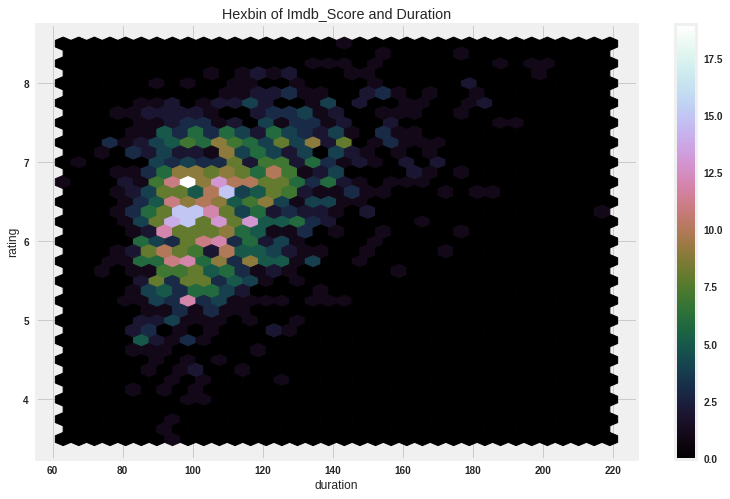

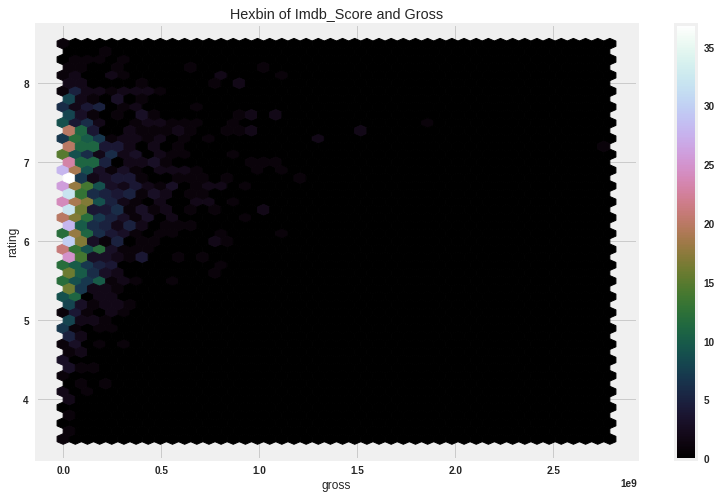

In [0]:
df.plot(y= 'rating', x ='duration',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Duration',figsize=(12,8))
df.plot(y= 'rating', x ='gross',kind='hexbin',gridsize=45, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Gross',figsize=(12,8))

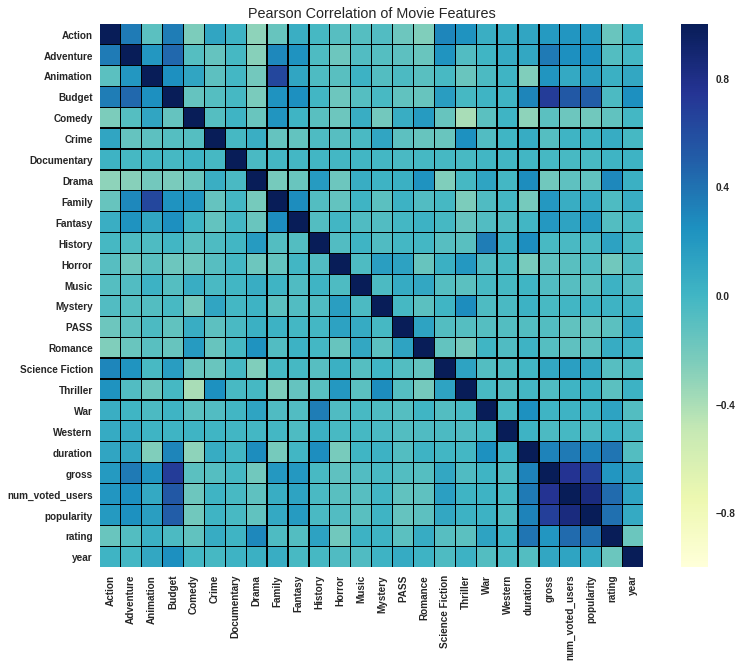

In [0]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(movie_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=False)

In [0]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [0]:
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance


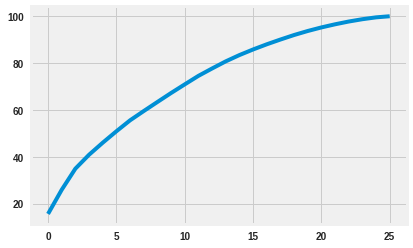

In [0]:
plt.plot(cum_var_exp)

In [0]:
from sklearn.decomposition import PCA # Principal Component Analysis module
pca = PCA(n_components=16)
x_4d = pca.fit_transform(X_std)

In [0]:
eig_pairs.sort(key = lambda x: x[0], reverse= True)
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.055304250880327
2.6792551262356428
2.347986865758045
1.5450309042872084
1.3370288473651202
1.2704832564125386
1.2157988121707117
1.0304614105859227
1.0072603690003197
0.9969199478057158
0.9594867786556849
0.945045996314791
0.8216796417037818
0.7911406946984654
0.6988841585917999
0.6222591282336808
0.5738224816347045
0.5300545489860643
0.502483995679324
0.44751099548371315
0.39657529390350943
0.3477390205047855
0.30838957462009714
0.25750876334267747
0.20594259354834993
0.12359759587130853


In [0]:
len(eig_pairs)

26

In [0]:
eig_vecs

In [0]:
PC=pd.DataFrame(eig_vecs, columns=X.columns)


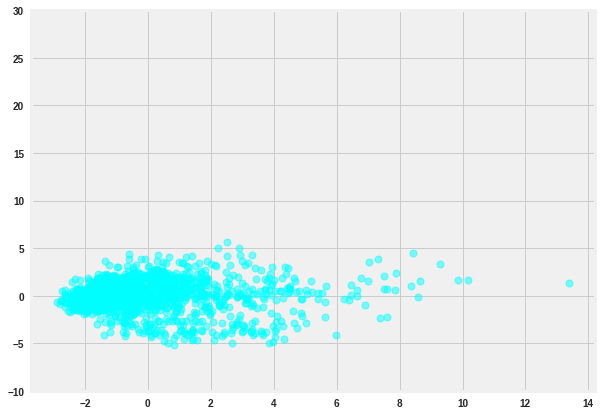

In [0]:
plt.figure(figsize = (9,7))
plt.scatter(x_4d[:,0],x_4d[:,1], c='cyan',alpha=0.5)
plt.ylim(-10,30)
plt.show()

### K-Means - Visualizing Clusters 

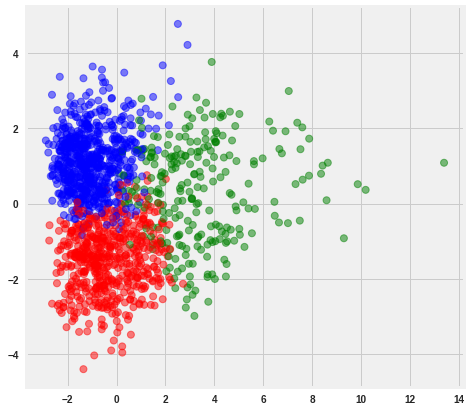

In [0]:
from sklearn.cluster import KMeans # KMeans clustering 
kmeans = KMeans(n_clusters=3)
X_clustered = kmeans.fit_predict(x_4d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3 : 'c'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,2], c= label_color, alpha=0.5) 
plt.show()

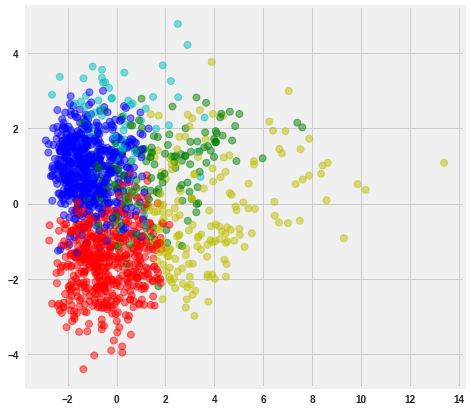

In [0]:
from sklearn.cluster import KMeans # KMeans clustering 
kmeans = KMeans(n_clusters=5)
X_clustered = kmeans.fit_predict(x_4d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3 : 'y', 4 : 'c'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,2], c= label_color, alpha=0.5) 
plt.show()

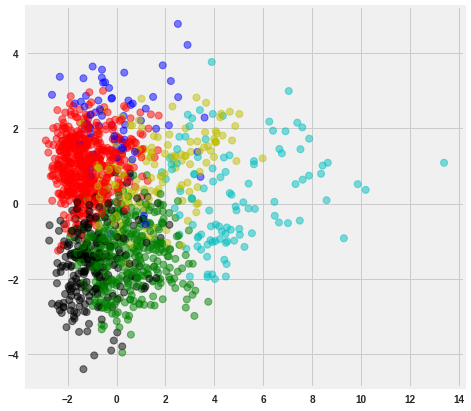

In [0]:
from sklearn.cluster import KMeans # KMeans clustering 
kmeans = KMeans(n_clusters=6)
X_clustered = kmeans.fit_predict(x_4d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3 : 'y', 4 : 'k', 5 : 'c'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,2], c= label_color, alpha=0.5) 
plt.show()

In [0]:
df_k = pd.DataFrame(x_4d)
df_k = df_k[[0,1,2,3]] 
df_k['X_cluster'] = X_clustered

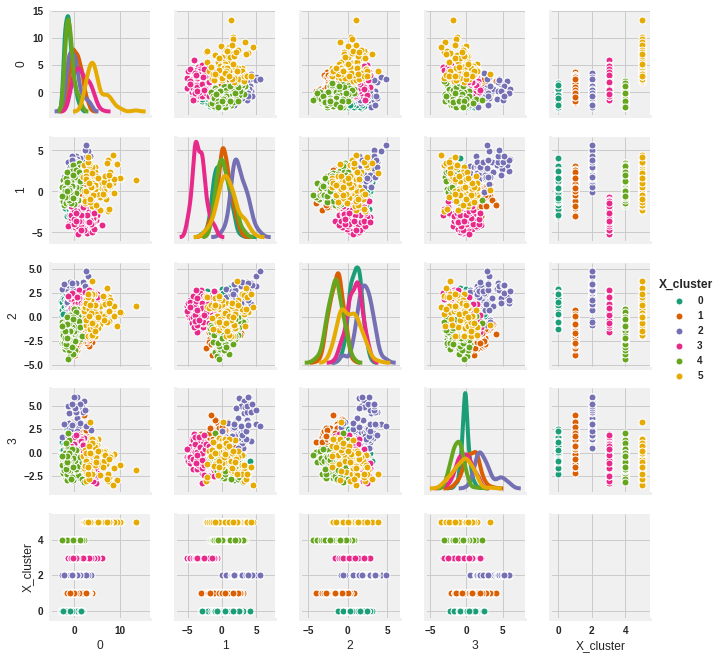

In [0]:
sns.pairplot(df_k, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

## EDA - NLP

### Cleaning Up

In [0]:
set_keywords = set()
for liste_keywords in df['plot_keywords'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

In [0]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        #for s in liste:
        for s in [s for s in liste_keywords if s in liste]:
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

### Most Occuring Plot Keywords - All vs. Passing Movies vs. Failed Movies

In [0]:
keyword_occurences, dum = count_word(df, 'plot_keywords', set_keywords)
keyword_occurences[:7]

[['duringcreditsstinger', 149],
 ['woman director', 103],
 ['aftercreditsstinger', 82],
 ['based on novel', 82],
 ['dystopia', 80],
 ['violence', 66],
 ['independent film', 56]]

In [0]:
keyword_occurences, dum = count_word(pass_df, 'plot_keywords', set_keywords)
keyword_occurences[:7]

[['woman director', 79],
 ['duringcreditsstinger', 71],
 ['based on novel', 39],
 ['aftercreditsstinger', 32],
 ['dystopia', 31],
 ['murder', 28],
 ['independent film', 28]]

In [0]:
keyword_occurences, dum = count_word(fail_df, 'plot_keywords', set_keywords)
keyword_occurences[:7]

## where's the women directors?!

[['duringcreditsstinger', 78],
 ['aftercreditsstinger', 50],
 ['dystopia', 49],
 ['based on novel', 43],
 ['violence', 40],
 ['alien', 34],
 ['superhero', 34]]

### Setting Up WordCloud

In [0]:
!pip install fuzzywuzzy

In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math, nltk, warnings
from nltk.corpus import wordnet
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import fuzz
from wordcloud import WordCloud, STOPWORDS
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings('ignore')
PS = nltk.stem.PorterStemmer()

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



In [0]:
keyword_occurences = [x for x in keyword_occurences if x[0]]

### WordCloud - ALL

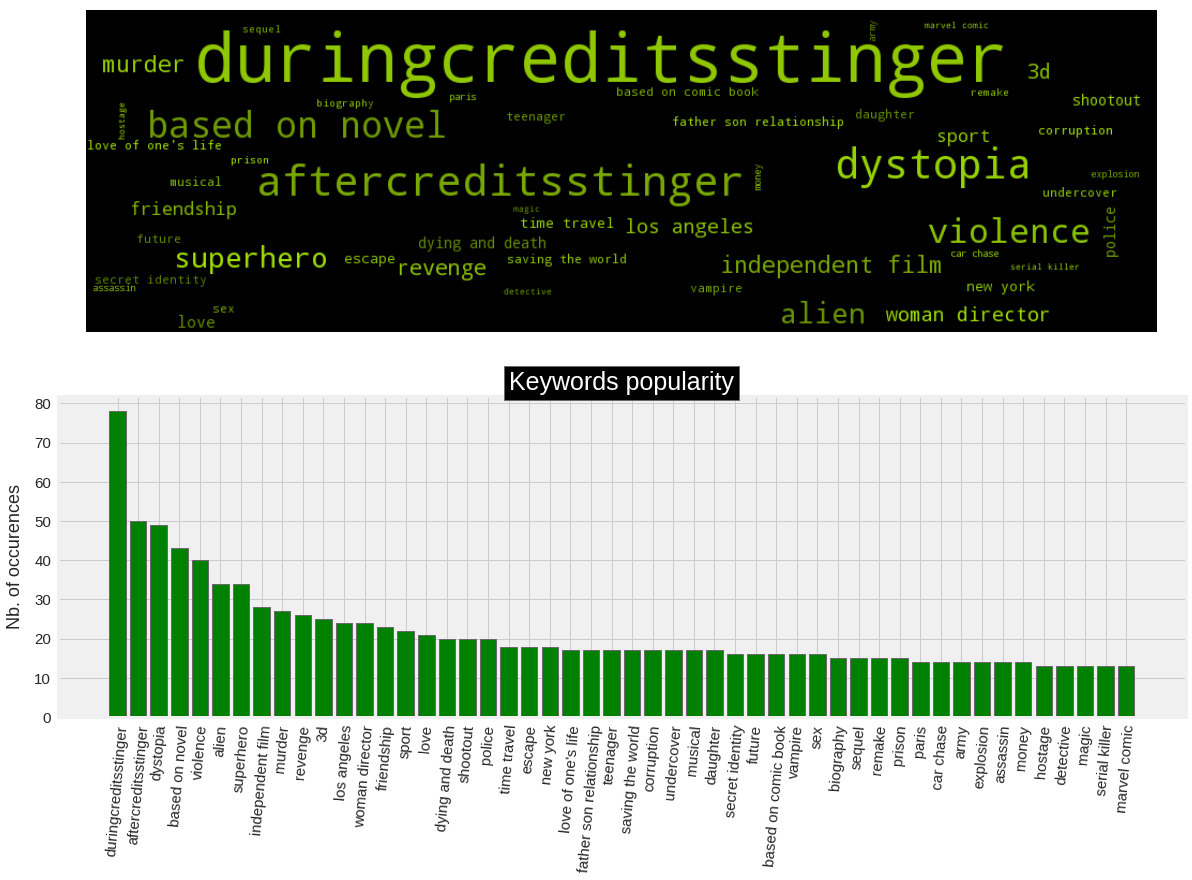

In [0]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

# UPPER PANEL: WORDCLOUD
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)

# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words
#
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')
# LOWER PANEL: HISTOGRAMS
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='g')
#_______________________
plt.title("Keywords popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

### WorldCloud - Pass

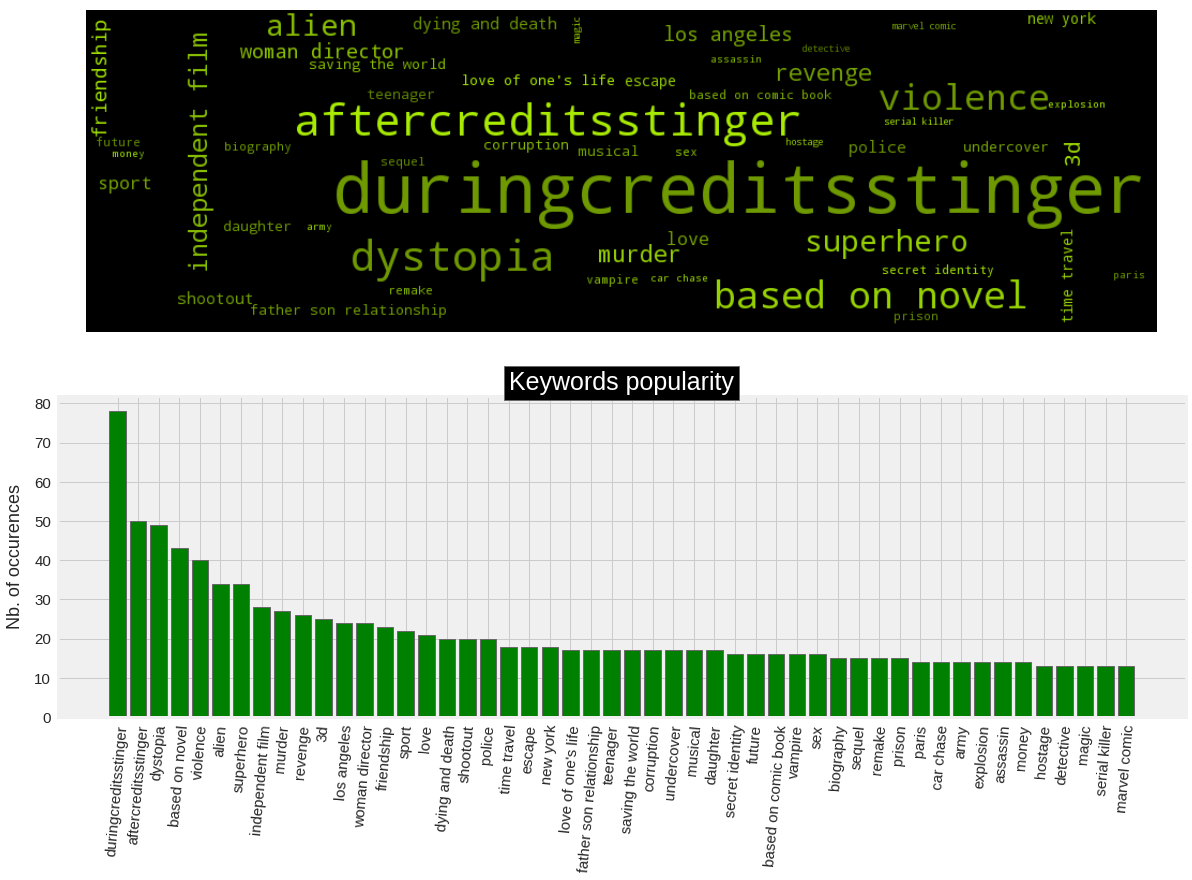

In [0]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

# UPPER PANEL: WORDCLOUD
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)

# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words
#
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')
# LOWER PANEL: HISTOGRAMS
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='g')
#_______________________
plt.title("Keywords popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

### WordCloud - Fail

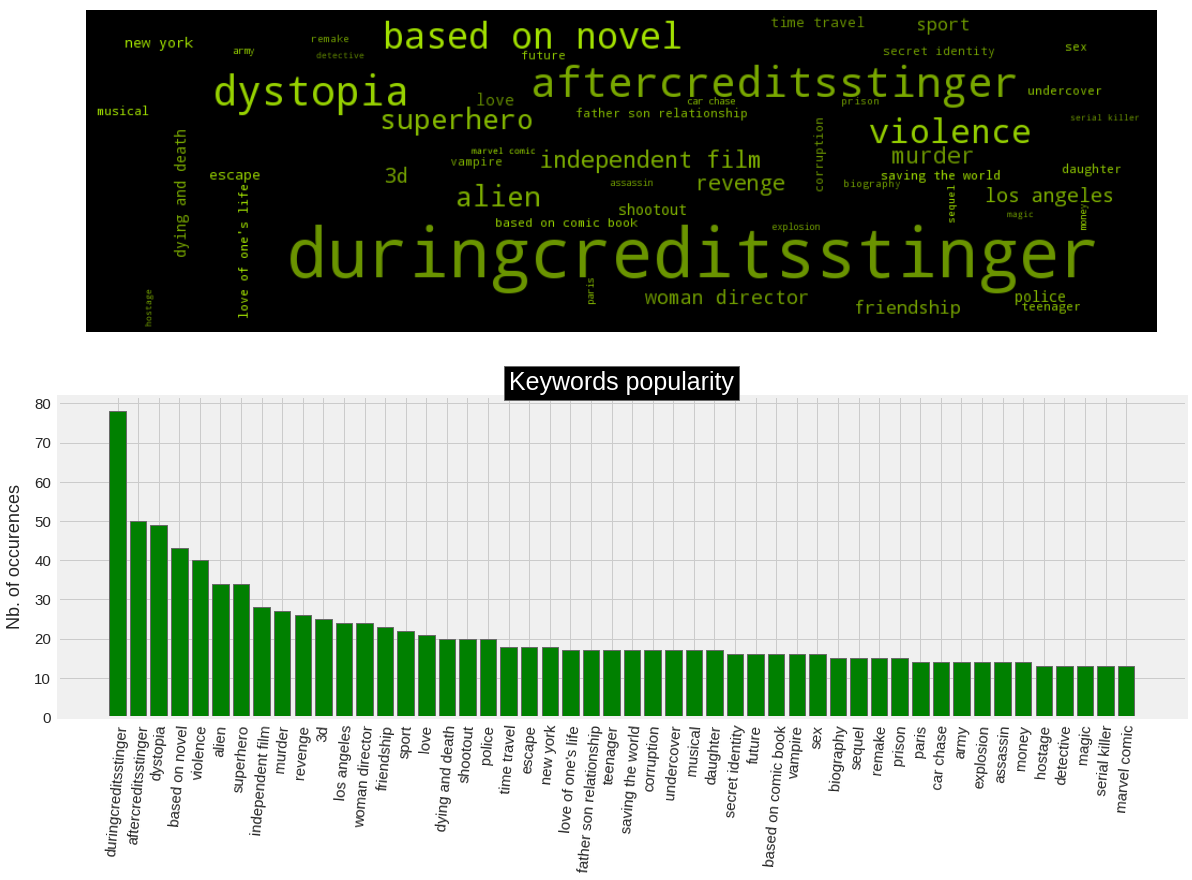

In [0]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

# UPPER PANEL: WORDCLOUD
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)

# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words
#
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')
# LOWER PANEL: HISTOGRAMS
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='g')
#_______________________
plt.title("Keywords popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

## More EDA

#### Pairplot

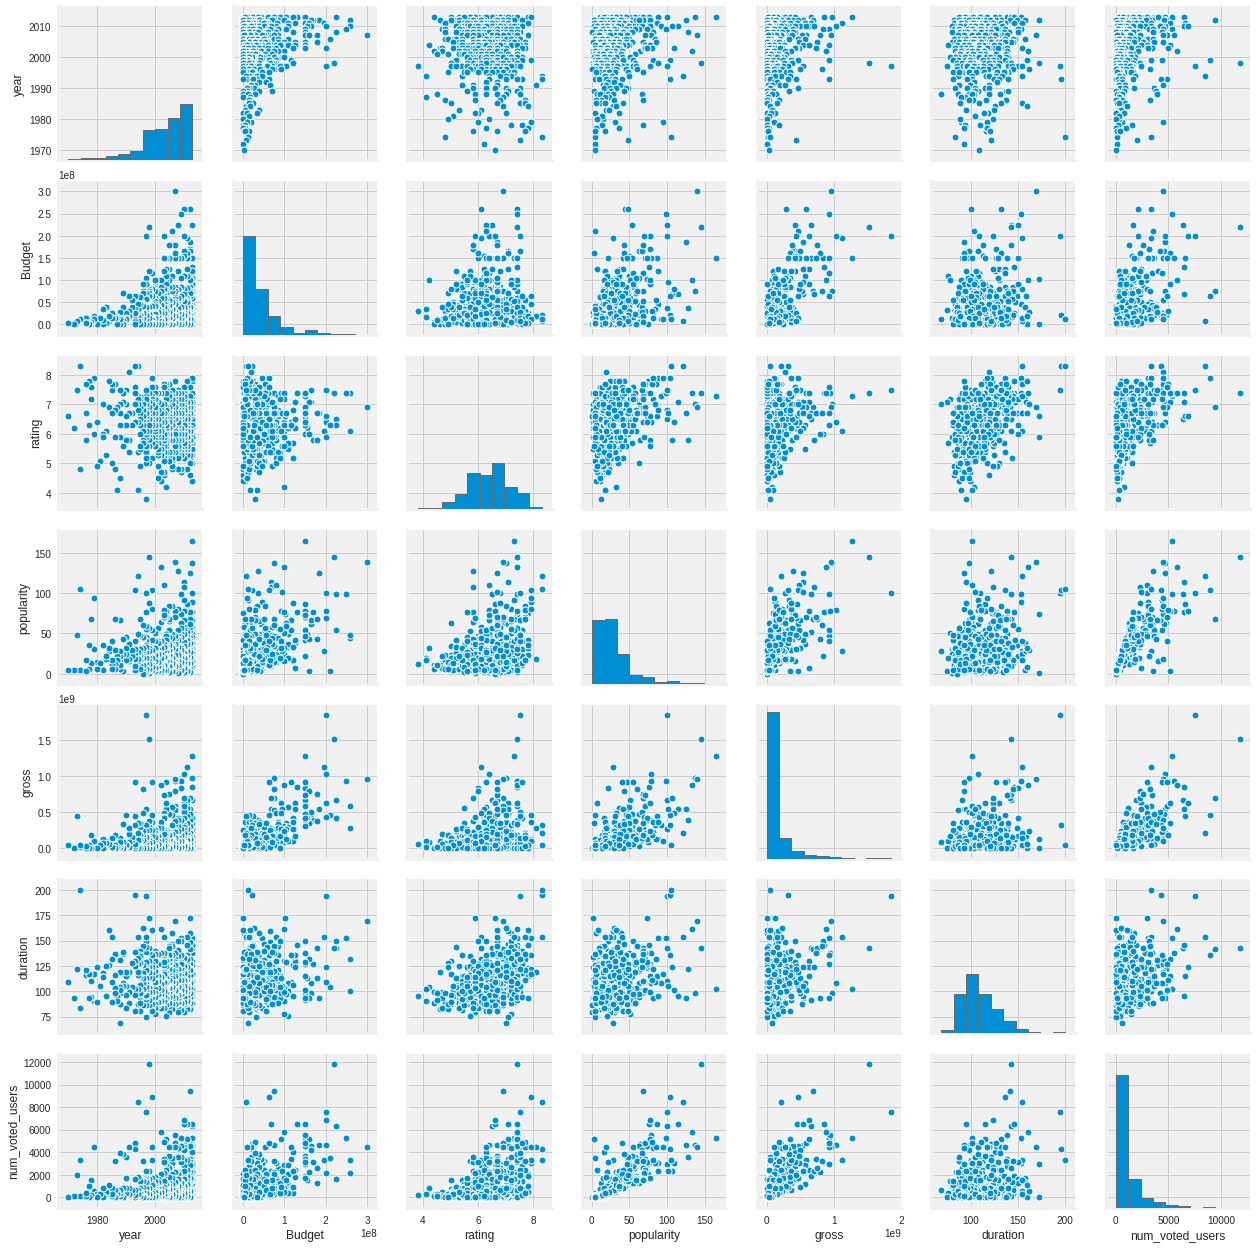

In [0]:
sns.pairplot(pass_df)

#### Most Popular Genres

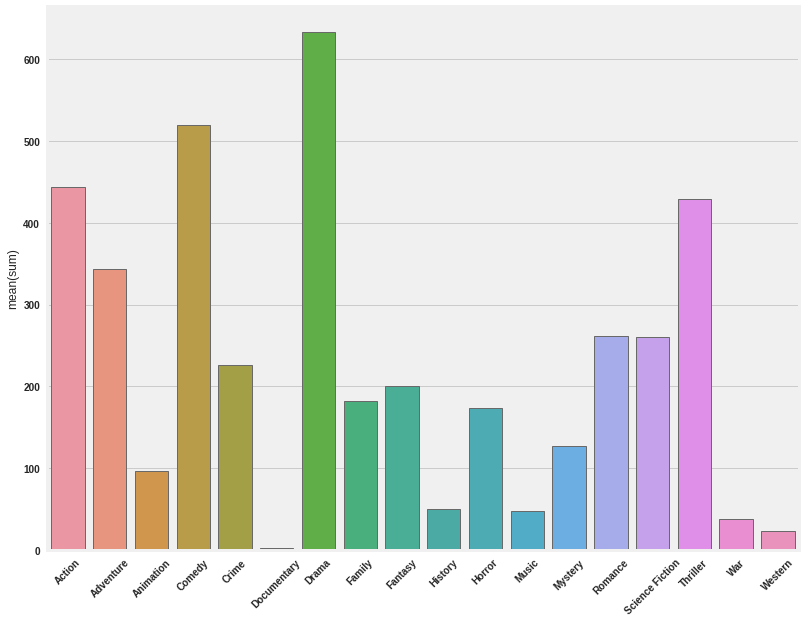

In [0]:
#df_genre=df['genres'].str.split('|',expand=True).stack().str.get_dummies().sum(level=0)

fig, ax = plt.subplots(1,figsize=(12,10))
plt.xticks(rotation=45)
k=pd.DataFrame(df_genre.sum(),columns=['sum'])
sns.barplot(y='sum',x=k.index,data=k,orient='v')

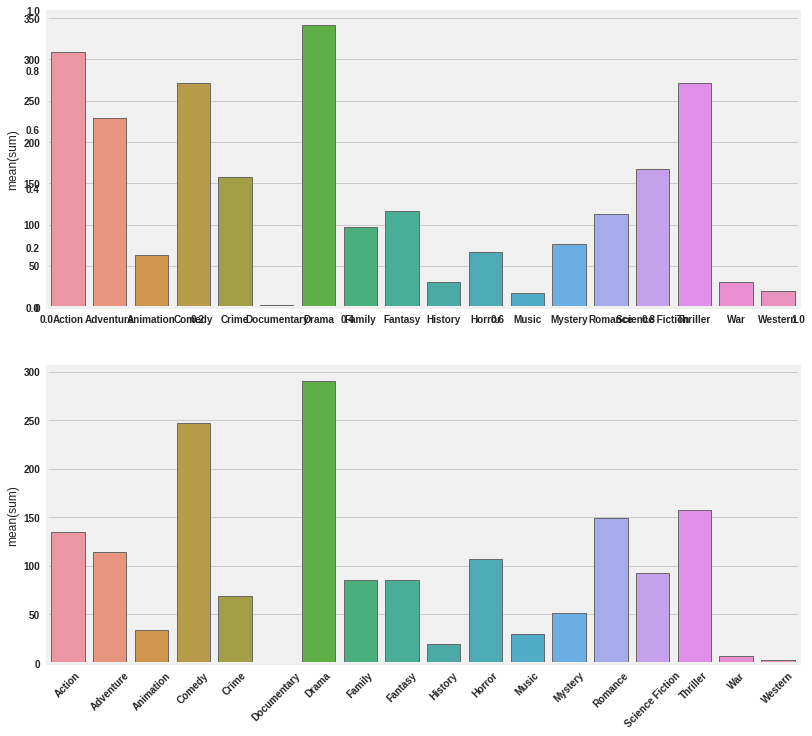

In [0]:
fig, ax = plt.subplots(2,1,figsize=(12,12))
plt.xticks(rotation=45)
k=pd.DataFrame(pass_df[['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western']].sum(),columns=['sum'])
sns.barplot(y='sum',x=k.index,data=k,orient='v')

ax2 = fig.add_subplot(2, 1, 1)

l=pd.DataFrame(fail_df[['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western']].sum(),columns=['sum'])
sns.barplot(y='sum',x=l.index,data=l,orient='v')


#### Genres

In [0]:
#df = pd.concat([df, df_genre], axis=1)

In [0]:
liste_genres = set()
for s in df['genres'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)

In [0]:
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(8,8))
genre_count = []
for genre in liste_genres:
    genre_count.append([genre, df[genre].values.sum()])
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
      autopct = lambda x:'{:2.0f}%'.format(x) if x>1 else '',
      shadow = False, startangle=0)
ax.axis('equal')
plt.tight_layout()

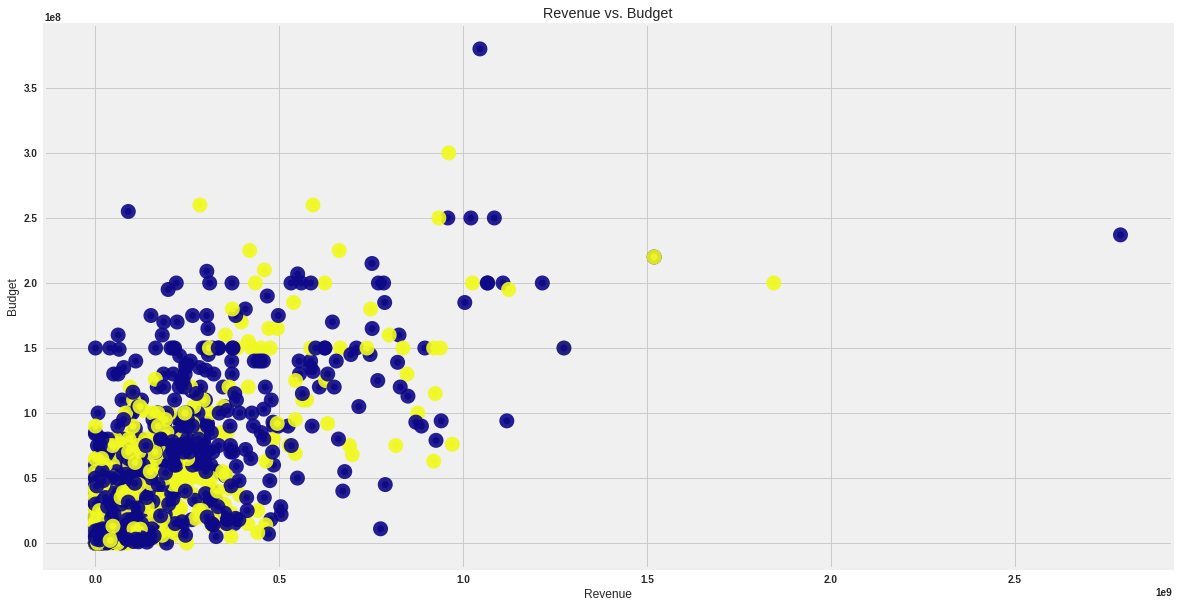

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
fig, ax = plt.subplots(figsize=(18,10))

# create data
x = df['gross']
y = df['Budget']
z = df['PASS']
 
plt.scatter(x, y, c=z, alpha=0.9, cmap='plasma', linewidth=8)
 
# Add titles (main and on axis)
plt.xlabel("Revenue")
plt.ylabel("Budget")
plt.title("Revenue vs. Budget")
 
plt.show()


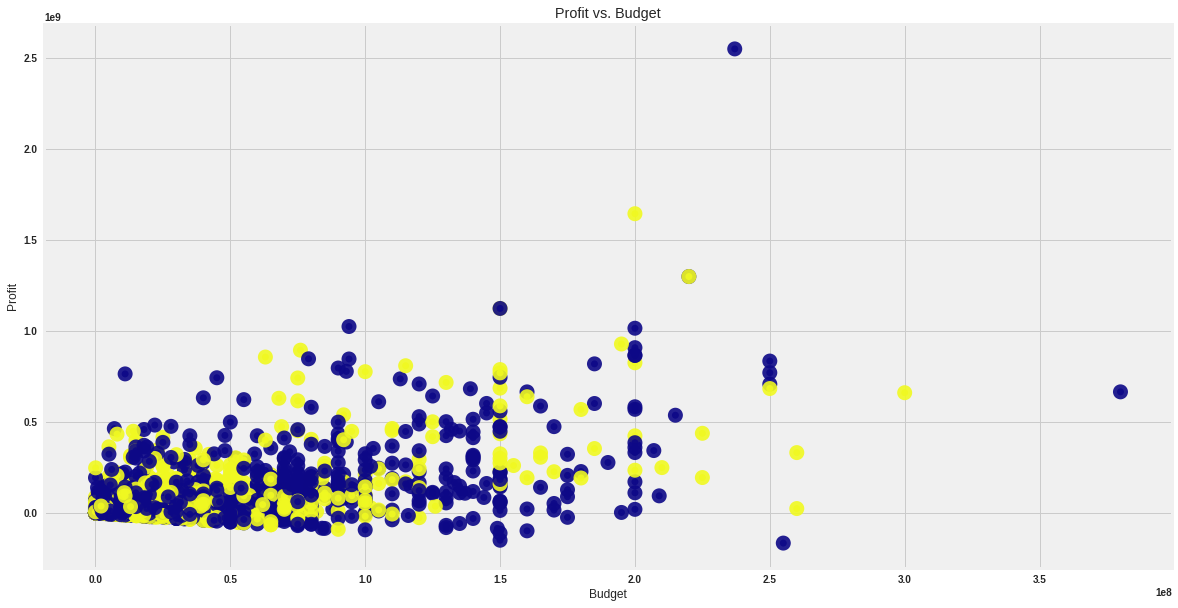

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
fig, ax = plt.subplots(figsize=(18,10))

# create data
x = df['Budget']
y = df['gross'] - df['Budget']
z = df['PASS']
plt.scatter(x, y, c=z, alpha=0.9, cmap='plasma', linewidth=8)
# Add titles (main and on axis)
plt.xlabel("Budget")
plt.ylabel("Profit")
plt.title("Profit vs. Budget")
 
plt.show()

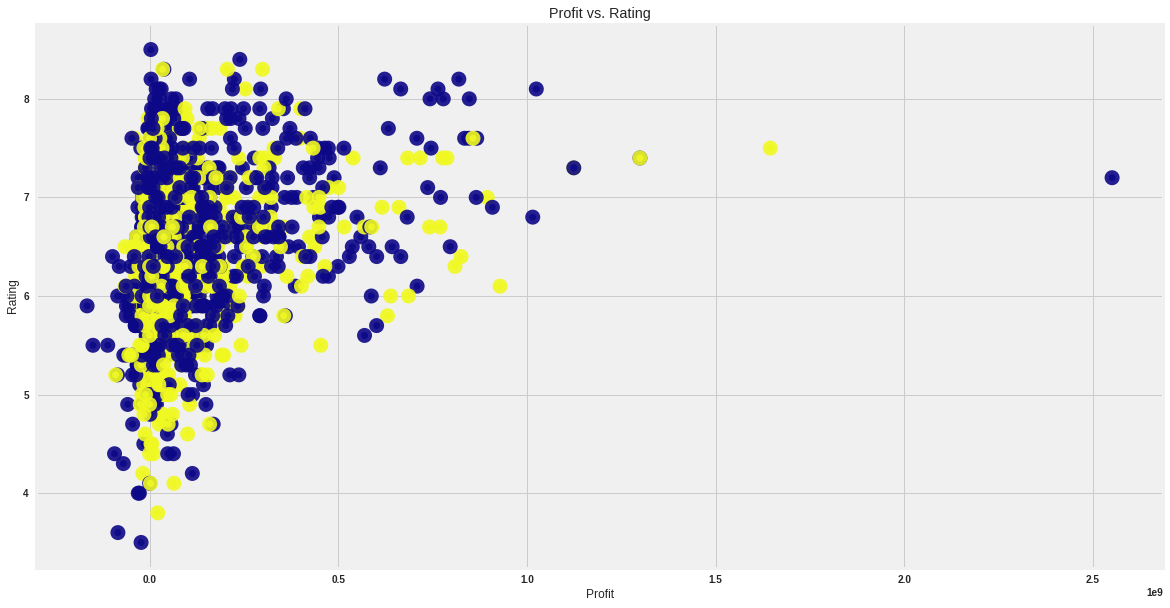

In [0]:
fig, ax = plt.subplots(figsize=(18,10))

# create data
x = df['gross'] - df['Budget']
y = df['rating']
z = df['PASS']
 
plt.scatter(x, y, c=z, alpha=0.9, cmap='plasma', linewidth=8)
 
# Add titles (main and on axis)
plt.xlabel("Profit")
plt.ylabel("Rating")
plt.title("Profit vs. Rating")
 
plt.show()


#### Hardest test to pass?

In [0]:
res = list(zip(*np.unique(fail_df['test'], return_counts=True)))
res

[('dubious', 59),
 ('dubious-disagree', 52),
 ('men', 99),
 ('men-disagree', 59),
 ('notalk', 327),
 ('notalk-disagree', 122),
 ('nowomen', 74),
 ('nowomen-disagree', 42)]

**Women talking to each other apparently**

---



## A look at the last few decades

###setup

In [0]:
df_fin=df[['year','PassOrFail']]

In [0]:
jj=df_fin[df_fin.PassOrFail == 'PASS']

In [0]:
dfbb = df_fin.groupby(['year','PassOrFail']).size().reset_index(name='count') 
dfbb

,year,PassOrFail,count
0,1970,PASS,1
1,1971,FAIL,5
2,1972,FAIL,2
3,1972,PASS,1
4,1973,FAIL,4
5,1973,PASS,1
6,1974,FAIL,4
7,1974,PASS,2
8,1975,FAIL,4
9,1976,FAIL,4


In [0]:
#dfbb = dfbb.fillna(value=0, axis=1)
len(x)
x2=x[2:]
len(x2)
#dfbb[dfbb.PassOrFail == 'FAIL']['count']
dfbb[dfbb.PassOrFail == 'PASS']['count'].iloc[0:,].shape
df_fin[df_fin.PassOrFail == 'FAIL'].sum.group_by('year')
#len(x)

42

In [0]:
#dfbb[dfbb.PassOrFail == 'FAIL']['count']
dfbb[dfbb.PassOrFail == 'PASS']['count'].iloc[0:,].shape

#len(x)

(42,)

## How many movies have passed in the last five decades?

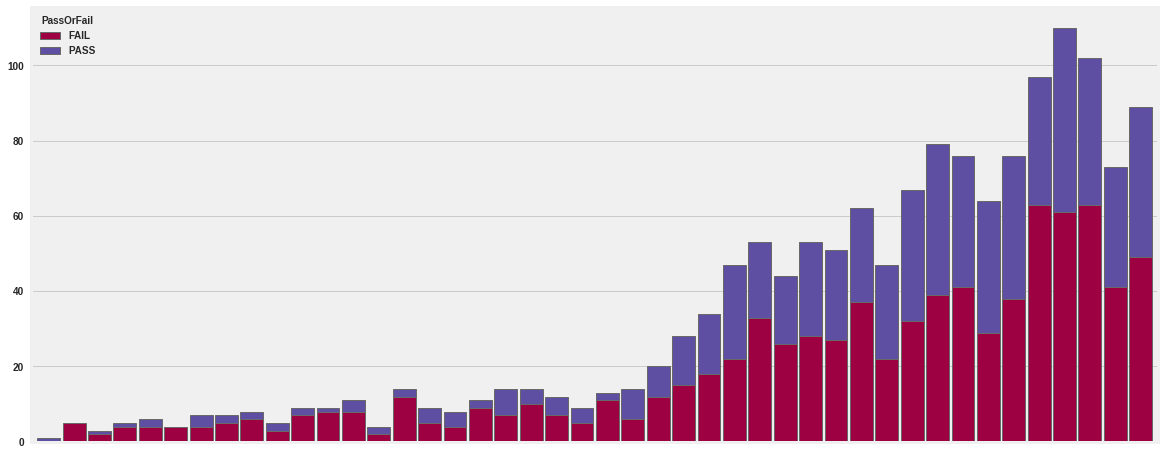

In [0]:
#dfbb = dfbb.set_index('year')
#moved the 'DATE' column into the index
dfbb.index = pd.to_datetime(dfbb.index)
#convert the string 'DATE' column to a datetime dtype
dfbb.set_index('PassOrFail',append=True)['count'].unstack().plot.bar(stacked=True,figsize=(18,8),cmap='Spectral', width=0.9).get_xaxis().set_visible(False)



# What We Know
* The movie industry struggles with fair representation of women in cinema 
* The standards we've set for 'passing' are a remarkably low bar
* Which we still have not passed
* Bechdel test passing movies had higher ROIs on average and tended to be lower budget
* The passing movies made more than the failing movies on average (profit)

## Test
* The hardest test to pass was having two women talk to each other
* The easiest was having and *naming* them


## Best genres for female representation:
- Comedy
- Drama
- Romance
- Thriller

## Worst genres for female representation:
- Western
- War
- Action
- Adventure



# What We Need

More violent, superhero movies featuring aliens and themes of revenge and murder (preferably in 3D) with :

1.    two named women...

2.   who talk to each other...

3. and have ***one*** conversation not revolving around men (this is easy - reference Baby Got Back)


# What We Need... to Think About

Why are women so woefully misrepresented in the film industry?
Why are we not holding the industry to a higher standard?
Finally: the passing movies made more **money** on average so what's the hold up?

If Sir Mix-A-Lot can pass the test - ANYONE can. 